# <center><font color = 'green'>PUBG Game Prediction</font></center>

<center><img src ="https://media3.giphy.com/media/XVbrX433vn6rqkexSj/giphy.gif?cid=ecf05e47zntkw7zfjgq3oeh41yv6ajfu8tfkwhryajtfope9&ep=v1_gifs_gifId&rid=giphy.gif&ct=g"></center>

## Table Content
1. [Importing Libraries](#import)
2. [Reading Data](#read)
3. [Data Wrangling](#wrag)
4. [Feature Engineering](#feature)
5. [ML - Catboost Model](#catboost)

## <font color='green'> Importing Libraries<a class ='anchor' id= 'import'></a></font>

In [1]:
# handling th error
import warnings
warnings.filterwarnings('ignore')

# standard libraries
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,6)

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import catboost as cb

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


## <font color='green'> Reading the Data <a class ='anchor' id= 'read'></a></font>

In [2]:
# loading the data
df = pd.read_csv('PUBG_Game_Prediction_data.csv')

In [3]:
#glimpse of the data
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
# data dimension
df.shape

(4446966, 29)

In [5]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

### Data Description
- **DBNOs** - Number of enemy players knocked.
- **assists** - Number of enemy players this player damaged that were killed by teammates.
- **boosts** - Number of boost items used.
- **damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted.
- **headshotKills** - Number of enemy players killed with headshots.
- **heals** - Number of healing items used.
- **Id** - Player’s Id
- **killPlace** - Ranking in match of number of enemy players killed.
- **killPoints** - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
- **killStreaks** - Max number of enemy players killed in a short amount of time.
- **kills** - Number of enemy players killed.
- **longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- **matchDuration** - Duration of match in seconds.
- **matchId** - ID to identify match. There are no matches that are in both the training and testing set.
- **matchType** - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- **rankPoints** - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
- **revives** - Number of times this player revived teammates.
- **rideDistance** - Total distance traveled in vehicles measured in meters.
- **roadKills** - Number of kills while in a vehicle.
- **swimDistance** - Total distance traveled by swimming measured in meters.
- **teamKills** - Number of times this player killed a teammate.
- **vehicleDestroys** - Number of vehicles destroyed.
- **walkDistance** - Total distance traveled on foot measured in meters.-
- **weaponsAcquired** - Number of weapons picked up.
- **winPoints** - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
- **groupId** - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- **numGroups** - Number of groups we have data for in the match.
- **maxPlace** - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- **winPlacePerc** - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

## <font color = 'green'> Data Wrangling<a class ='anchor' id= 'wrag'></a></font>

### **Check for the rows with missing win prediction value**

In [6]:
# check row with NULL win prediction value
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [7]:
# remove the data row
df.drop(2744604, inplace = True)

### **Understanding Players distribution in a game**

In [8]:
# prepare new parameter to know how many players are there in a game
df['playersJoined'] = df.groupby('matchId')['matchId'].transform('count')

In [9]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


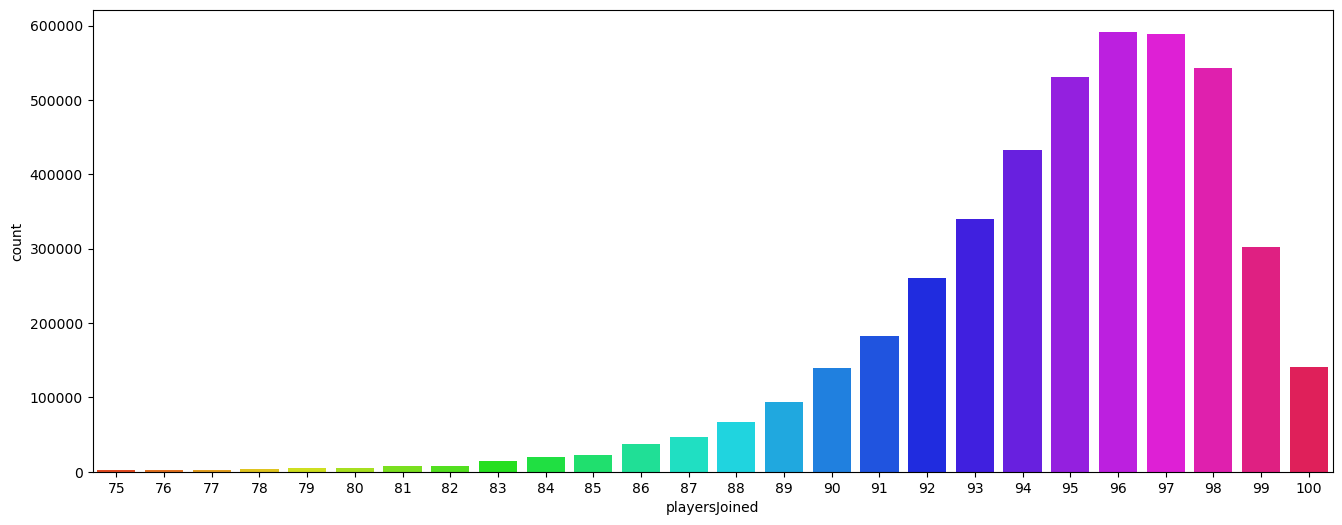

In [10]:
filtered_df = df[df['playersJoined'] >= 75]
aggregated_data = filtered_df['playersJoined'].value_counts().reset_index()
aggregated_data.columns = ['playersJoined', 'count']

# Plotting the countplot on the aggregated data
palette = sns.color_palette("hsv", len(aggregated_data))

sns.barplot(x='playersJoined', y='count', data=aggregated_data,palette = palette)
plt.show()

### **Analysing the Data**

Kills Without Moving?

<center><img src = "https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExbGpmMzN3bGRldDN0bnl0bTVmeHBoc2E3dnZ3ZGtoNmZjZjgybGs1dyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3oxHQfzBhpKtgdDWtW/giphy.webp"></center>

In [11]:
# Prepare a data parameter to gather the information of the total distance travelled
df['TotalDistance'] = df['rideDistance'] + df['swimDistance'] + df['walkDistance']

# prepare a data parameter to check for anamoly detection that the person has not moved but still managed to do the kills
df['KillsWithoutMoving'] = ((df['kills'] > 0) & (df['TotalDistance']==0))

In [12]:
df[df['KillsWithoutMoving']==True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,TotalDistance,KillsWithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [13]:
df[df['KillsWithoutMoving']==True].shape

(1535, 32)

In [14]:
# drop the table
df.drop(df[df['KillsWithoutMoving']==True].index, inplace = True)

### **Extraordinary Road Kills????**

<center><img src= "https://media0.giphy.com/media/v1.Y2lkPTc5MGI3NjExdmpzZ3loaHdwMXNmY2tkdDk5eHB1NXozM21qcmJma2lqNG1kMHlldCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3o6fJgHrd1G8PJjoIw/giphy.webp"></center>


In [15]:
df[df['roadKills']>5].shape

(46, 32)

In [16]:
df.drop(df[df['roadKills']>5].index, inplace = True)

### **So Many Kills - How??**

<center><img src = "https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExN2Z1MDFkdWRzaDg1aDUya2FtZXFkcnVnbHRkbHNienlteTlvZjJjZSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/vVwv7I87uB9gZ7avim/giphy.webp"></center>

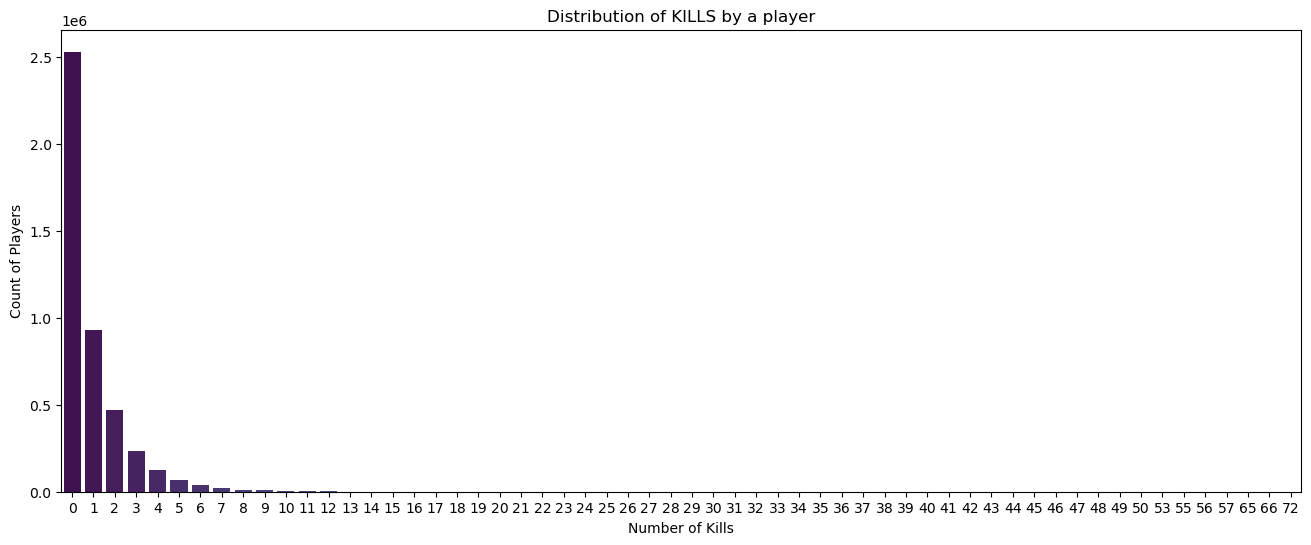

In [17]:
sns.countplot(data=df,x = df['kills'], palette = 'viridis').set_title('Distribution of KILLS by a player')
plt.ylabel("Count of Players")
plt.xlabel("Number of Kills")
plt.show()

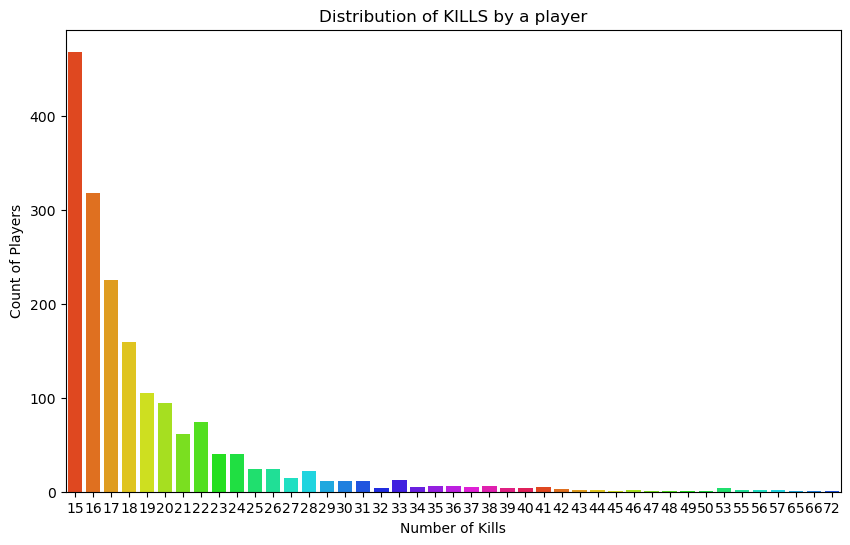

In [18]:
filtered_df = df[df['kills'] >= 15]
palette = sns.color_palette("hsv", len(aggregated_data))
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='kills', palette=palette).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of Players")
plt.xlabel("Number of Kills")
plt.show()

In [19]:
# data dimension
df[df['kills'] >20].shape

(417, 32)

In [20]:
#drop the instances
df.drop(df[df['kills'] >20].index, inplace = True)

### **Head Shot**

<center><img src = "https://media0.giphy.com/media/v1.Y2lkPTc5MGI3NjExcDhwcHVuYzBkN3o0YzkxZmVna2I4MG5vMjcwOW1hYXZicjhmaXpwdiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3ohs7KDycW74VZ9Deo/giphy.webp"></center>

In [21]:
df['headshot_rate'] = df['headshotKills']/df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)

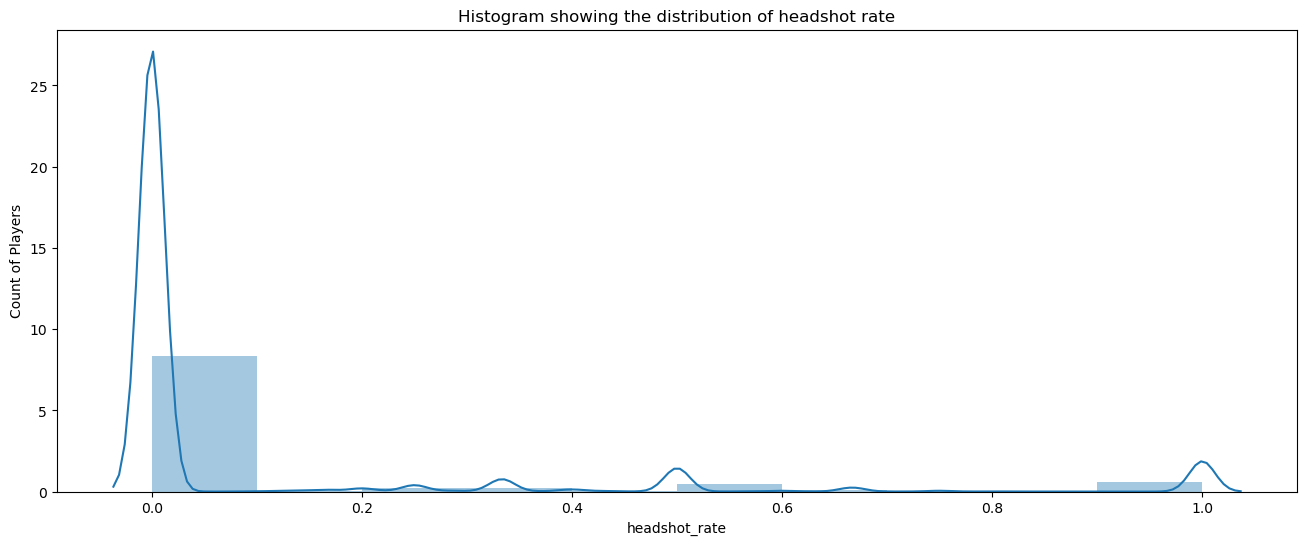

In [22]:
#plot the headshot rate distribution
sns.distplot(df['headshot_rate'], bins = 10).set_title('Histogram showing the distribution of headshot rate')
plt.ylabel("Count of Players")
plt.show()

In [23]:
df[(df['headshot_rate']==1)&(df['kills']>5)].shape

(187, 33)

In [24]:
df.drop(df[(df['headshot_rate']==1)&(df['kills']>5)].index, inplace= True)

### **Longest Shot**

<center><img src= "https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExMmVyNnE2ZTdnNnF1eW05a2k3YXB5eWdiZnB5Ym1qb2pybWY0NjAzMSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/xT0xeHi1rHNKi8j4Ck/giphy.webp"></center>

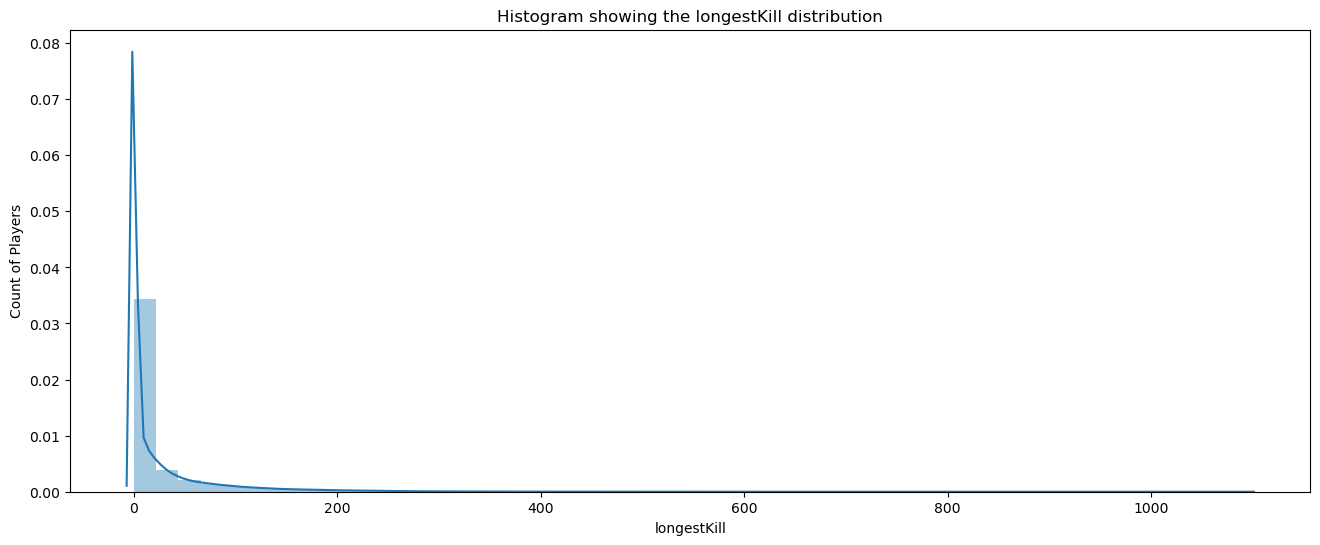

In [25]:
sns.distplot(df['longestKill'], bins = 50).set_title('Histogram showing the longestKill distribution')
plt.ylabel("Count of Players")
plt.show()

In [26]:
df[df['longestKill']>=500].shape

(1738, 33)

In [27]:
df.drop(df[df['longestKill']>=500].index, inplace = True)

### Weapon Change

<center><img src = "https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExdDVnMG9xZjQ0cDQ1NW91amt2aTNzeHczczJnaDhjNXNxZTNtc3U3ayZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/aVmxtJLqovaeICfH4g/giphy.webp"></center>

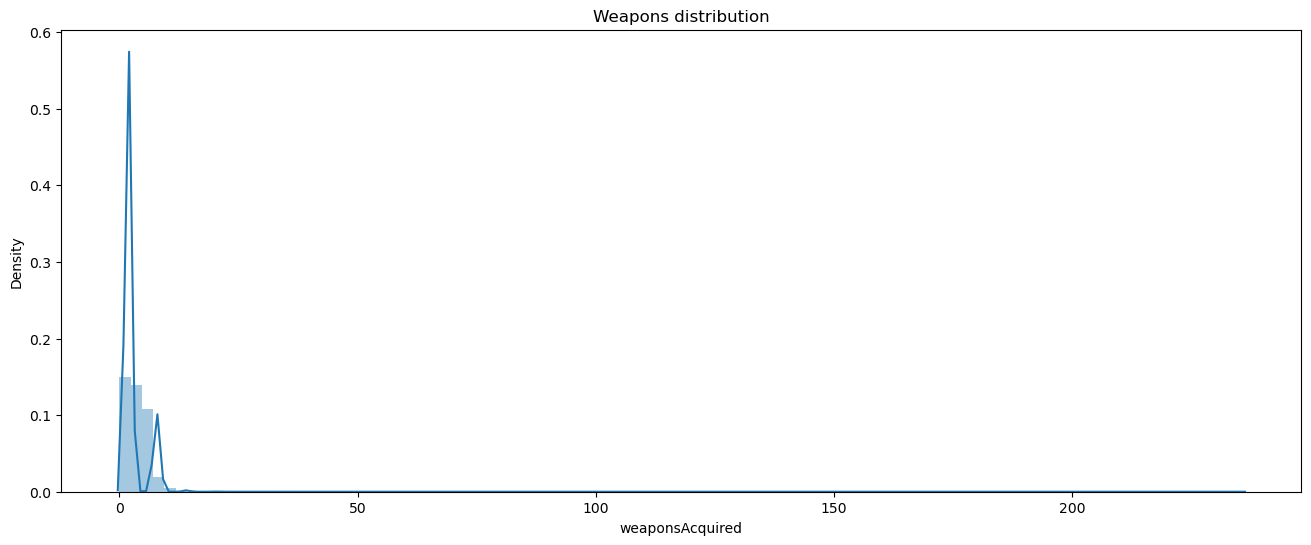

In [28]:
sns.distplot(df['weaponsAcquired'], bins = 100).set_title('Weapons distribution')
plt.show()

In [29]:
df[df['weaponsAcquired']>=15].shape

(6809, 33)

In [30]:
df.drop(df[df['weaponsAcquired']>=15].index, inplace = True)

### EDA

In [31]:
df.shape

(4436233, 33)

In [32]:
df.isnull().sum()

Id                    0
groupId               0
matchId               0
assists               0
boosts                0
damageDealt           0
DBNOs                 0
headshotKills         0
heals                 0
killPlace             0
killPoints            0
kills                 0
killStreaks           0
longestKill           0
matchDuration         0
matchType             0
maxPlace              0
numGroups             0
rankPoints            0
revives               0
rideDistance          0
roadKills             0
swimDistance          0
teamKills             0
vehicleDestroys       0
walkDistance          0
weaponsAcquired       0
winPoints             0
winPlacePerc          0
playersJoined         0
TotalDistance         0
KillsWithoutMoving    0
headshot_rate         0
dtype: int64

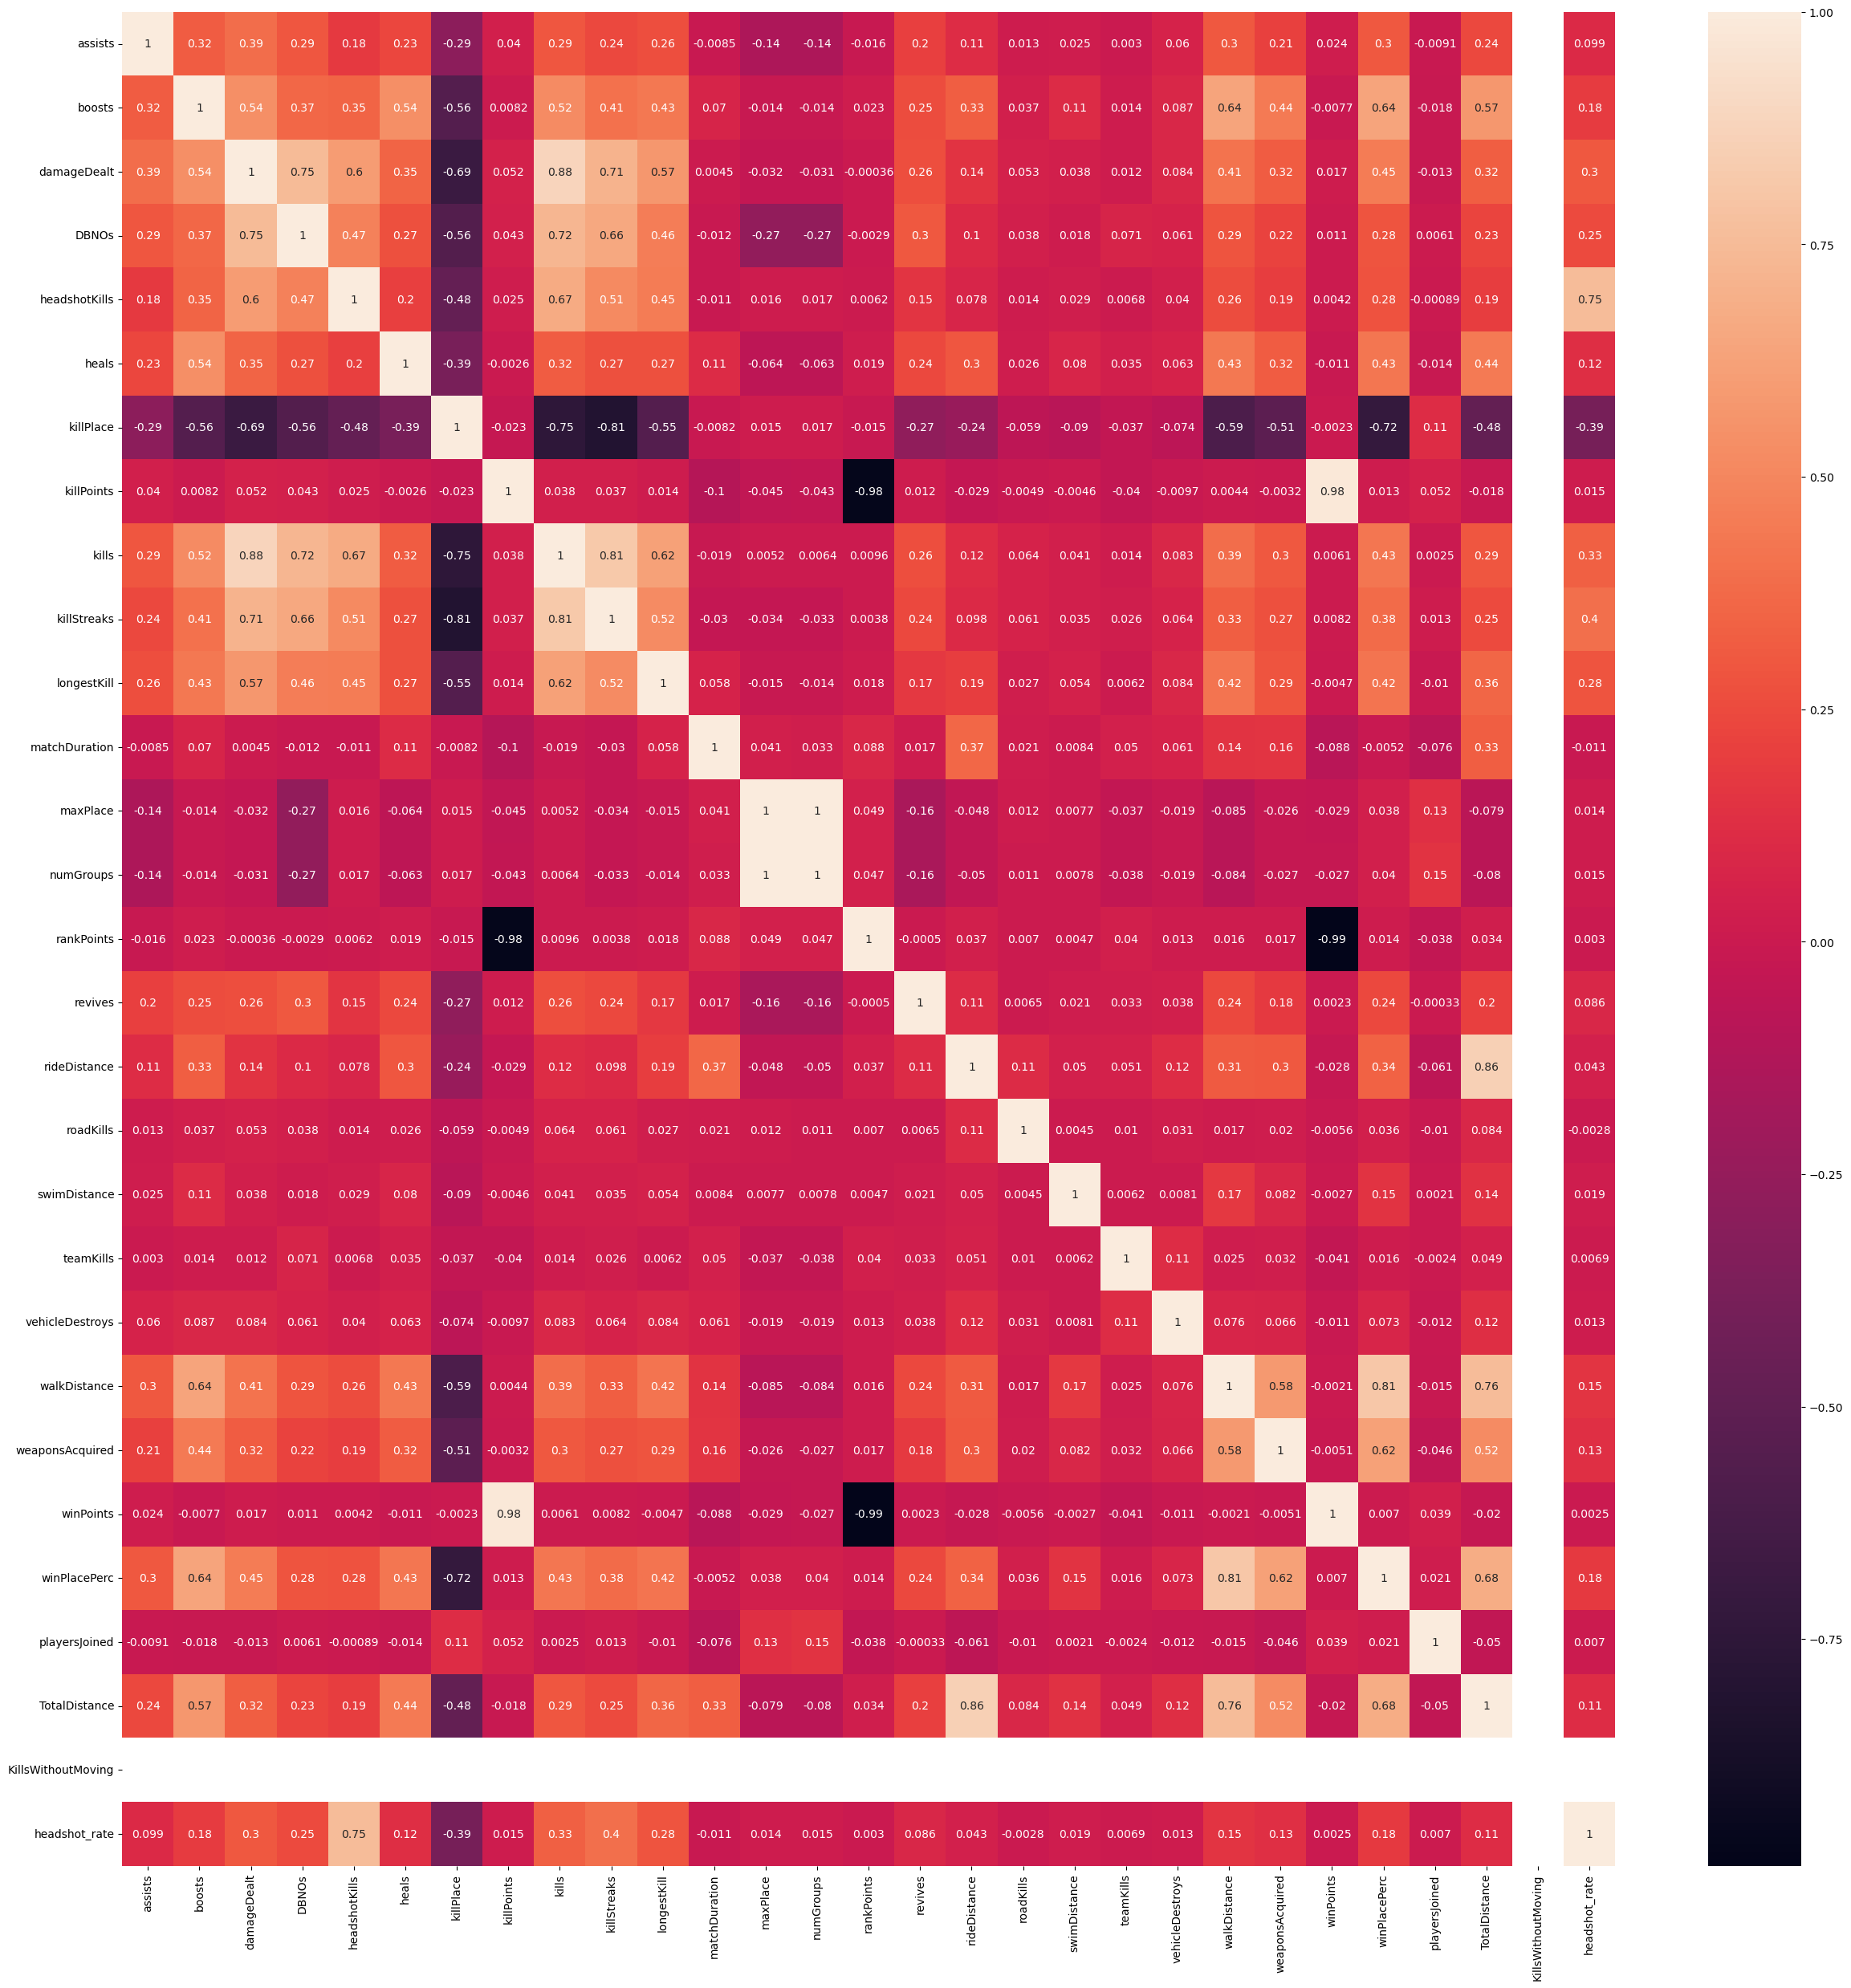

In [33]:
# correlation of parameter with Win Prediction 
plt.figure(figsize=[30,30])
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.show()

## <font color = 'green'> Feature Engineering<a class ='anchor' id= 'feature'></a></font>

In [34]:
normalising_factor = (100 - df['playersJoined']/100) + 1

In [35]:
df['killsNorm'] = df['kills']*normalising_factor
df['damageDealtNorm'] = df['damageDealt']*normalising_factor
df['maxPlaceNorm'] = df['maxPlace']*normalising_factor
df['matchDurationNorm'] = df['matchDuration']*normalising_factor

df['traveldistance'] = df['walkDistance'] + df['swimDistance']  +df['rideDistance']
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [36]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined',
       'TotalDistance', 'KillsWithoutMoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [37]:
data = df.drop(columns = ['Id','groupId','matchId','assists','boosts','walkDistance','swimDistance','rideDistance','heals',
                          'revives','kills','damageDealt','maxPlace','matchDuration'])

In [38]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,TotalDistance,KillsWithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


## <font color = 'green'> ML - Catboost Model<a class ='anchor' id= 'catboost'></a></font>

### **Handling Categorical Data**

In [39]:
x = data.drop(['winPlacePerc'],axis = 1)
y = data['winPlacePerc']

In [40]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,TotalDistance,KillsWithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


In [41]:
x = pd.get_dummies(x,columns = ['matchType','KillsWithoutMoving'])

In [42]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,KillsWithoutMoving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,False,False,False,False,False,False,False,False,True,True
1,0,0,57,0,0,0.00,25,1484,0,0,...,False,False,False,False,False,False,False,False,True,True
2,0,0,47,0,0,0.00,47,1491,0,0,...,False,False,False,False,False,False,False,False,False,True
3,0,0,75,0,0,0.00,30,1408,0,0,...,False,False,False,False,False,False,False,False,True,True
4,0,0,45,0,1,58.53,95,1560,0,0,...,False,False,False,False,False,False,True,False,False,True


In [43]:
x.shape

(4436233, 40)

In [44]:
features = x.columns

### Scaling the Data

In [45]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x))

In [46]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.582948,-0.384165,0.449324,1.172491,-0.765121,-0.459623,-0.732885,-1.212390,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405066,1.236181,0.0
1,-0.582948,-0.384165,0.340033,-0.804728,-0.765121,-0.459623,-0.775859,0.803565,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405066,1.236181,0.0
2,-0.582948,-0.384165,-0.024272,-0.804728,-0.765121,-0.459623,0.169559,0.813067,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405066,-0.808943,0.0
3,-0.582948,-0.384165,0.995782,-0.804728,-0.765121,-0.459623,-0.560991,0.700391,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405066,1.236181,0.0
4,-0.582948,-0.384165,-0.097133,-0.804728,0.647737,0.727503,2.232287,0.906738,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,2.696902,-0.405066,-0.808943,0.0


### Spilitting the data

In [47]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=0)

In [48]:
print(xtrain.shape , ytrain.shape)
print(xtest.shape, ytest.shape)

(3105363, 40) (3105363,)
(1330870, 40) (1330870,)


### CatBoost Model

In [49]:
import catboost as cb

In [50]:
train_dataset = cb.Pool(xtrain,ytrain)
test_dataset  = cb.Pool(xtest,ytest)

In [51]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [52]:
#GRID Search
grid = {'iterations': [100,150],
        'learning_rate': [0.03,0.1],
        'depth' : [2,4,6,8]}

model.grid_search(grid, train_dataset)

0:	learn: 0.5480985	test: 0.5486727	best: 0.5486727 (0)	total: 335ms	remaining: 33.2s
1:	learn: 0.5332354	test: 0.5337938	best: 0.5337938 (1)	total: 512ms	remaining: 25.1s
2:	learn: 0.5188656	test: 0.5194102	best: 0.5194102 (2)	total: 687ms	remaining: 22.2s
3:	learn: 0.5049623	test: 0.5054874	best: 0.5054874 (3)	total: 881ms	remaining: 21.1s
4:	learn: 0.4915250	test: 0.4920378	best: 0.4920378 (4)	total: 1.08s	remaining: 20.6s
5:	learn: 0.4785252	test: 0.4790259	best: 0.4790259 (5)	total: 1.26s	remaining: 19.7s
6:	learn: 0.4659407	test: 0.4664248	best: 0.4664248 (6)	total: 1.44s	remaining: 19.1s
7:	learn: 0.4537628	test: 0.4542307	best: 0.4542307 (7)	total: 1.61s	remaining: 18.5s
8:	learn: 0.4419502	test: 0.4424068	best: 0.4424068 (8)	total: 1.78s	remaining: 18s
9:	learn: 0.4305462	test: 0.4309894	best: 0.4309894 (9)	total: 1.96s	remaining: 17.7s
10:	learn: 0.4195114	test: 0.4199403	best: 0.4199403 (10)	total: 2.14s	remaining: 17.3s
11:	learn: 0.4088471	test: 0.4092662	best: 0.4092662 (

95:	learn: 0.1394491	test: 0.1396526	best: 0.1396526 (95)	total: 17.4s	remaining: 726ms
96:	learn: 0.1390744	test: 0.1392772	best: 0.1392772 (96)	total: 17.6s	remaining: 544ms
97:	learn: 0.1387091	test: 0.1389122	best: 0.1389122 (97)	total: 17.8s	remaining: 363ms
98:	learn: 0.1383604	test: 0.1385638	best: 0.1385638 (98)	total: 17.9s	remaining: 181ms
99:	learn: 0.1379820	test: 0.1381828	best: 0.1381828 (99)	total: 18.1s	remaining: 0us

bestTest = 0.1381827686
bestIteration = 99

0:	loss: 0.1381828	best: 0.1381828 (0)	total: 20.4s	remaining: 5m 5s
0:	learn: 0.5125243	test: 0.5130643	best: 0.5130643 (0)	total: 201ms	remaining: 19.9s
1:	learn: 0.4669825	test: 0.4674744	best: 0.4674744 (1)	total: 376ms	remaining: 18.4s
2:	learn: 0.4264523	test: 0.4268923	best: 0.4268923 (2)	total: 557ms	remaining: 18s
3:	learn: 0.3903065	test: 0.3907146	best: 0.3907146 (3)	total: 738ms	remaining: 17.7s
4:	learn: 0.3581174	test: 0.3584873	best: 0.3584873 (4)	total: 925ms	remaining: 17.6s
5:	learn: 0.3296765	

88:	learn: 0.1171517	test: 0.1172898	best: 0.1172898 (88)	total: 17.9s	remaining: 2.22s
89:	learn: 0.1170664	test: 0.1172039	best: 0.1172039 (89)	total: 18.1s	remaining: 2.02s
90:	learn: 0.1169518	test: 0.1170901	best: 0.1170901 (90)	total: 18.3s	remaining: 1.81s
91:	learn: 0.1168578	test: 0.1169964	best: 0.1169964 (91)	total: 18.5s	remaining: 1.61s
92:	learn: 0.1167612	test: 0.1169003	best: 0.1169003 (92)	total: 18.7s	remaining: 1.41s
93:	learn: 0.1166168	test: 0.1167579	best: 0.1167579 (93)	total: 19s	remaining: 1.21s
94:	learn: 0.1163191	test: 0.1164587	best: 0.1164587 (94)	total: 19.2s	remaining: 1.01s
95:	learn: 0.1159557	test: 0.1160941	best: 0.1160941 (95)	total: 19.4s	remaining: 809ms
96:	learn: 0.1158679	test: 0.1160045	best: 0.1160045 (96)	total: 19.6s	remaining: 607ms
97:	learn: 0.1157348	test: 0.1158709	best: 0.1158709 (97)	total: 19.8s	remaining: 405ms
98:	learn: 0.1156595	test: 0.1157932	best: 0.1157932 (98)	total: 20s	remaining: 202ms
99:	learn: 0.1155926	test: 0.1157272

82:	learn: 0.1459743	test: 0.1461815	best: 0.1461815 (82)	total: 18.6s	remaining: 15s
83:	learn: 0.1453204	test: 0.1455244	best: 0.1455244 (83)	total: 18.7s	remaining: 14.7s
84:	learn: 0.1447388	test: 0.1449422	best: 0.1449422 (84)	total: 18.9s	remaining: 14.5s
85:	learn: 0.1441806	test: 0.1443849	best: 0.1443849 (85)	total: 19.1s	remaining: 14.2s
86:	learn: 0.1436312	test: 0.1438346	best: 0.1438346 (86)	total: 19.3s	remaining: 14s
87:	learn: 0.1431169	test: 0.1433204	best: 0.1433204 (87)	total: 19.5s	remaining: 13.7s
88:	learn: 0.1425621	test: 0.1427639	best: 0.1427639 (88)	total: 19.7s	remaining: 13.5s
89:	learn: 0.1420758	test: 0.1422801	best: 0.1422801 (89)	total: 19.9s	remaining: 13.3s
90:	learn: 0.1416203	test: 0.1418252	best: 0.1418252 (90)	total: 20.1s	remaining: 13s
91:	learn: 0.1411662	test: 0.1413715	best: 0.1413715 (91)	total: 20.3s	remaining: 12.8s
92:	learn: 0.1406879	test: 0.1408900	best: 0.1408900 (92)	total: 20.5s	remaining: 12.6s
93:	learn: 0.1402720	test: 0.1404755	b

24:	learn: 0.1441674	test: 0.1443783	best: 0.1443783 (24)	total: 4.43s	remaining: 22.2s
25:	learn: 0.1423731	test: 0.1425812	best: 0.1425812 (25)	total: 4.61s	remaining: 22s
26:	learn: 0.1407098	test: 0.1409117	best: 0.1409117 (26)	total: 4.79s	remaining: 21.8s
27:	learn: 0.1393336	test: 0.1395363	best: 0.1395363 (27)	total: 4.98s	remaining: 21.7s
28:	learn: 0.1381116	test: 0.1383127	best: 0.1383127 (28)	total: 5.16s	remaining: 21.5s
29:	learn: 0.1370217	test: 0.1372254	best: 0.1372254 (29)	total: 5.34s	remaining: 21.4s
30:	learn: 0.1360388	test: 0.1362472	best: 0.1362472 (30)	total: 5.51s	remaining: 21.2s
31:	learn: 0.1351318	test: 0.1353442	best: 0.1353442 (31)	total: 5.69s	remaining: 21s
32:	learn: 0.1341731	test: 0.1343774	best: 0.1343774 (32)	total: 5.87s	remaining: 20.8s
33:	learn: 0.1334355	test: 0.1336412	best: 0.1336412 (33)	total: 6.04s	remaining: 20.6s
34:	learn: 0.1323121	test: 0.1325148	best: 0.1325148 (34)	total: 6.23s	remaining: 20.5s
35:	learn: 0.1316856	test: 0.1318879

118:	learn: 0.1131210	test: 0.1132639	best: 0.1132639 (118)	total: 20.7s	remaining: 5.39s
119:	learn: 0.1130572	test: 0.1131989	best: 0.1131989 (119)	total: 20.9s	remaining: 5.22s
120:	learn: 0.1128526	test: 0.1129928	best: 0.1129928 (120)	total: 21.1s	remaining: 5.04s
121:	learn: 0.1125581	test: 0.1126932	best: 0.1126932 (121)	total: 21.2s	remaining: 4.87s
122:	learn: 0.1124156	test: 0.1125519	best: 0.1125519 (122)	total: 21.4s	remaining: 4.7s
123:	learn: 0.1123551	test: 0.1124910	best: 0.1124910 (123)	total: 21.6s	remaining: 4.52s
124:	learn: 0.1122496	test: 0.1123881	best: 0.1123881 (124)	total: 21.7s	remaining: 4.34s
125:	learn: 0.1121981	test: 0.1123371	best: 0.1123371 (125)	total: 21.9s	remaining: 4.17s
126:	learn: 0.1121349	test: 0.1122735	best: 0.1122735 (126)	total: 22.1s	remaining: 4s
127:	learn: 0.1118468	test: 0.1119775	best: 0.1119775 (127)	total: 22.2s	remaining: 3.82s
128:	learn: 0.1116168	test: 0.1117421	best: 0.1117421 (128)	total: 22.4s	remaining: 3.65s
129:	learn: 0.

60:	learn: 0.1533749	test: 0.1535279	best: 0.1535279 (60)	total: 15.3s	remaining: 9.75s
61:	learn: 0.1517226	test: 0.1518742	best: 0.1518742 (61)	total: 15.5s	remaining: 9.5s
62:	learn: 0.1500927	test: 0.1502434	best: 0.1502434 (62)	total: 15.7s	remaining: 9.24s
63:	learn: 0.1485822	test: 0.1487318	best: 0.1487318 (63)	total: 16s	remaining: 8.98s
64:	learn: 0.1469572	test: 0.1471045	best: 0.1471045 (64)	total: 16.2s	remaining: 8.73s
65:	learn: 0.1455402	test: 0.1456858	best: 0.1456858 (65)	total: 16.4s	remaining: 8.47s
66:	learn: 0.1441948	test: 0.1443380	best: 0.1443380 (66)	total: 16.7s	remaining: 8.22s
67:	learn: 0.1428725	test: 0.1430147	best: 0.1430147 (67)	total: 16.9s	remaining: 7.97s
68:	learn: 0.1416351	test: 0.1417744	best: 0.1417744 (68)	total: 17.2s	remaining: 7.72s
69:	learn: 0.1404738	test: 0.1406130	best: 0.1406130 (69)	total: 17.4s	remaining: 7.47s
70:	learn: 0.1391799	test: 0.1393191	best: 0.1393191 (70)	total: 17.7s	remaining: 7.23s
71:	learn: 0.1380949	test: 0.138232

53:	learn: 0.1060287	test: 0.1060726	best: 0.1060726 (53)	total: 13s	remaining: 11.1s
54:	learn: 0.1058104	test: 0.1058530	best: 0.1058530 (54)	total: 13.3s	remaining: 10.9s
55:	learn: 0.1055225	test: 0.1055626	best: 0.1055626 (55)	total: 13.5s	remaining: 10.6s
56:	learn: 0.1053061	test: 0.1053483	best: 0.1053483 (56)	total: 13.7s	remaining: 10.3s
57:	learn: 0.1051554	test: 0.1051960	best: 0.1051960 (57)	total: 13.9s	remaining: 10.1s
58:	learn: 0.1048423	test: 0.1048867	best: 0.1048867 (58)	total: 14.1s	remaining: 9.8s
59:	learn: 0.1043634	test: 0.1044075	best: 0.1044075 (59)	total: 14.4s	remaining: 9.57s
60:	learn: 0.1041998	test: 0.1042419	best: 0.1042419 (60)	total: 14.6s	remaining: 9.3s
61:	learn: 0.1039218	test: 0.1039702	best: 0.1039702 (61)	total: 14.8s	remaining: 9.06s
62:	learn: 0.1035672	test: 0.1036093	best: 0.1036093 (62)	total: 15.2s	remaining: 8.91s
63:	learn: 0.1032731	test: 0.1033135	best: 0.1033135 (63)	total: 15.4s	remaining: 8.65s
64:	learn: 0.1029159	test: 0.1029456

46:	learn: 0.1862437	test: 0.1864222	best: 0.1864222 (46)	total: 12.4s	remaining: 27.2s
47:	learn: 0.1832424	test: 0.1834185	best: 0.1834185 (47)	total: 12.7s	remaining: 27s
48:	learn: 0.1803691	test: 0.1805440	best: 0.1805440 (48)	total: 13s	remaining: 26.9s
49:	learn: 0.1776500	test: 0.1778244	best: 0.1778244 (49)	total: 13.3s	remaining: 26.6s
50:	learn: 0.1750070	test: 0.1751812	best: 0.1751812 (50)	total: 13.6s	remaining: 26.4s
51:	learn: 0.1723344	test: 0.1725048	best: 0.1725048 (51)	total: 13.9s	remaining: 26.1s
52:	learn: 0.1698896	test: 0.1700583	best: 0.1700583 (52)	total: 14.1s	remaining: 25.9s
53:	learn: 0.1674047	test: 0.1675683	best: 0.1675683 (53)	total: 14.4s	remaining: 25.6s
54:	learn: 0.1651358	test: 0.1652965	best: 0.1652965 (54)	total: 14.7s	remaining: 25.4s
55:	learn: 0.1629034	test: 0.1630615	best: 0.1630615 (55)	total: 15s	remaining: 25.1s
56:	learn: 0.1608294	test: 0.1609871	best: 0.1609871 (56)	total: 15.3s	remaining: 24.9s
57:	learn: 0.1588530	test: 0.1590101	b

139:	learn: 0.1109655	test: 0.1110613	best: 0.1110613 (139)	total: 41.4s	remaining: 3.02s
140:	learn: 0.1108417	test: 0.1109358	best: 0.1109358 (140)	total: 41.7s	remaining: 2.72s
141:	learn: 0.1107150	test: 0.1108085	best: 0.1108085 (141)	total: 42s	remaining: 2.42s
142:	learn: 0.1105818	test: 0.1106737	best: 0.1106737 (142)	total: 42.3s	remaining: 2.11s
143:	learn: 0.1104667	test: 0.1105577	best: 0.1105577 (143)	total: 42.6s	remaining: 1.81s
144:	learn: 0.1103654	test: 0.1104547	best: 0.1104547 (144)	total: 42.8s	remaining: 1.51s
145:	learn: 0.1101236	test: 0.1102130	best: 0.1102130 (145)	total: 43.2s	remaining: 1.21s
146:	learn: 0.1100319	test: 0.1101212	best: 0.1101212 (146)	total: 43.4s	remaining: 905ms
147:	learn: 0.1099452	test: 0.1100330	best: 0.1100330 (147)	total: 43.9s	remaining: 605ms
148:	learn: 0.1097437	test: 0.1098321	best: 0.1098321 (148)	total: 44.3s	remaining: 304ms
149:	learn: 0.1095998	test: 0.1096845	best: 0.1096845 (149)	total: 44.6s	remaining: 0us

bestTest = 0.

82:	learn: 0.0986516	test: 0.0986708	best: 0.0986708 (82)	total: 26.3s	remaining: 21.2s
83:	learn: 0.0983646	test: 0.0983792	best: 0.0983792 (83)	total: 26.5s	remaining: 20.9s
84:	learn: 0.0982653	test: 0.0982803	best: 0.0982803 (84)	total: 26.8s	remaining: 20.5s
85:	learn: 0.0981768	test: 0.0981890	best: 0.0981890 (85)	total: 27.1s	remaining: 20.2s
86:	learn: 0.0979695	test: 0.0979851	best: 0.0979851 (86)	total: 27.4s	remaining: 19.8s
87:	learn: 0.0978567	test: 0.0978717	best: 0.0978717 (87)	total: 27.6s	remaining: 19.4s
88:	learn: 0.0977738	test: 0.0977853	best: 0.0977853 (88)	total: 27.8s	remaining: 19.1s
89:	learn: 0.0976314	test: 0.0976395	best: 0.0976395 (89)	total: 28.1s	remaining: 18.7s
90:	learn: 0.0975267	test: 0.0975381	best: 0.0975381 (90)	total: 28.3s	remaining: 18.3s
91:	learn: 0.0973435	test: 0.0973537	best: 0.0973537 (91)	total: 28.6s	remaining: 18s
92:	learn: 0.0972399	test: 0.0972516	best: 0.0972516 (92)	total: 28.8s	remaining: 17.7s
93:	learn: 0.0971752	test: 0.09718

24:	learn: 0.2868629	test: 0.2871060	best: 0.2871060 (24)	total: 12.9s	remaining: 38.7s
25:	learn: 0.2799016	test: 0.2801370	best: 0.2801370 (25)	total: 13.3s	remaining: 37.9s
26:	learn: 0.2731548	test: 0.2733822	best: 0.2733822 (26)	total: 13.8s	remaining: 37.4s
27:	learn: 0.2665929	test: 0.2668118	best: 0.2668118 (27)	total: 14.3s	remaining: 36.9s
28:	learn: 0.2603294	test: 0.2605427	best: 0.2605427 (28)	total: 14.9s	remaining: 36.4s
29:	learn: 0.2542823	test: 0.2544902	best: 0.2544902 (29)	total: 15.4s	remaining: 35.8s
30:	learn: 0.2484089	test: 0.2486103	best: 0.2486103 (30)	total: 15.8s	remaining: 35.3s
31:	learn: 0.2427337	test: 0.2429290	best: 0.2429290 (31)	total: 16.4s	remaining: 34.8s
32:	learn: 0.2372368	test: 0.2374238	best: 0.2374238 (32)	total: 16.8s	remaining: 34.1s
33:	learn: 0.2319237	test: 0.2321041	best: 0.2321041 (33)	total: 17.3s	remaining: 33.6s
34:	learn: 0.2268191	test: 0.2269977	best: 0.2269977 (34)	total: 17.8s	remaining: 33.1s
35:	learn: 0.2218930	test: 0.222

17:	learn: 0.1420534	test: 0.1421677	best: 0.1421677 (17)	total: 8.53s	remaining: 38.9s
18:	learn: 0.1365002	test: 0.1366136	best: 0.1366136 (18)	total: 8.99s	remaining: 38.3s
19:	learn: 0.1317855	test: 0.1318974	best: 0.1318974 (19)	total: 9.44s	remaining: 37.8s
20:	learn: 0.1277943	test: 0.1279013	best: 0.1279013 (20)	total: 9.83s	remaining: 37s
21:	learn: 0.1244136	test: 0.1245098	best: 0.1245098 (21)	total: 10.2s	remaining: 36.3s
22:	learn: 0.1211141	test: 0.1212148	best: 0.1212148 (22)	total: 10.7s	remaining: 35.8s
23:	learn: 0.1185074	test: 0.1186060	best: 0.1186060 (23)	total: 11.1s	remaining: 35.2s
24:	learn: 0.1160512	test: 0.1161569	best: 0.1161569 (24)	total: 11.6s	remaining: 34.7s
25:	learn: 0.1141803	test: 0.1142874	best: 0.1142874 (25)	total: 11.9s	remaining: 33.9s
26:	learn: 0.1124700	test: 0.1125769	best: 0.1125769 (26)	total: 12.3s	remaining: 33.4s
27:	learn: 0.1109938	test: 0.1110995	best: 0.1110995 (27)	total: 12.8s	remaining: 32.9s
28:	learn: 0.1097377	test: 0.10984

10:	learn: 0.4139237	test: 0.4143186	best: 0.4143186 (10)	total: 5.14s	remaining: 1m 5s
11:	learn: 0.4028091	test: 0.4031886	best: 0.4031886 (11)	total: 5.62s	remaining: 1m 4s
12:	learn: 0.3919950	test: 0.3923603	best: 0.3923603 (12)	total: 6.13s	remaining: 1m 4s
13:	learn: 0.3815952	test: 0.3819459	best: 0.3819459 (13)	total: 6.59s	remaining: 1m 4s
14:	learn: 0.3714472	test: 0.3717830	best: 0.3717830 (14)	total: 7.07s	remaining: 1m 3s
15:	learn: 0.3616442	test: 0.3619717	best: 0.3619717 (15)	total: 7.53s	remaining: 1m 3s
16:	learn: 0.3521996	test: 0.3525162	best: 0.3525162 (16)	total: 8s	remaining: 1m 2s
17:	learn: 0.3430246	test: 0.3433309	best: 0.3433309 (17)	total: 8.49s	remaining: 1m 2s
18:	learn: 0.3341995	test: 0.3344937	best: 0.3344937 (18)	total: 8.95s	remaining: 1m 1s
19:	learn: 0.3255933	test: 0.3258761	best: 0.3258761 (19)	total: 9.41s	remaining: 1m 1s
20:	learn: 0.3173135	test: 0.3175871	best: 0.3175871 (20)	total: 9.87s	remaining: 1m
21:	learn: 0.3092966	test: 0.3095625	b

104:	learn: 0.1075095	test: 0.1075661	best: 0.1075661 (104)	total: 46.7s	remaining: 20s
105:	learn: 0.1072368	test: 0.1072931	best: 0.1072931 (105)	total: 47.2s	remaining: 19.6s
106:	learn: 0.1069631	test: 0.1070168	best: 0.1070168 (106)	total: 47.7s	remaining: 19.2s
107:	learn: 0.1067074	test: 0.1067592	best: 0.1067592 (107)	total: 48.1s	remaining: 18.7s
108:	learn: 0.1063791	test: 0.1064321	best: 0.1064321 (108)	total: 48.7s	remaining: 18.3s
109:	learn: 0.1060924	test: 0.1061455	best: 0.1061455 (109)	total: 49.3s	remaining: 17.9s
110:	learn: 0.1058295	test: 0.1058794	best: 0.1058794 (110)	total: 49.7s	remaining: 17.5s
111:	learn: 0.1054732	test: 0.1055224	best: 0.1055224 (111)	total: 50.2s	remaining: 17s
112:	learn: 0.1051654	test: 0.1052120	best: 0.1052120 (112)	total: 50.7s	remaining: 16.6s
113:	learn: 0.1049613	test: 0.1050063	best: 0.1050063 (113)	total: 51.1s	remaining: 16.1s
114:	learn: 0.1046944	test: 0.1047406	best: 0.1047406 (114)	total: 51.6s	remaining: 15.7s
115:	learn: 0.

46:	learn: 0.0976773	test: 0.0977217	best: 0.0977217 (46)	total: 21.1s	remaining: 46.3s
47:	learn: 0.0972445	test: 0.0972879	best: 0.0972879 (47)	total: 21.6s	remaining: 45.8s
48:	learn: 0.0969617	test: 0.0970064	best: 0.0970064 (48)	total: 22s	remaining: 45.4s
49:	learn: 0.0966018	test: 0.0966368	best: 0.0966368 (49)	total: 22.4s	remaining: 44.9s
50:	learn: 0.0962342	test: 0.0962701	best: 0.0962701 (50)	total: 22.9s	remaining: 44.5s
51:	learn: 0.0959045	test: 0.0959379	best: 0.0959379 (51)	total: 23.3s	remaining: 43.8s
52:	learn: 0.0955201	test: 0.0955519	best: 0.0955519 (52)	total: 23.6s	remaining: 43.3s
53:	learn: 0.0952359	test: 0.0952744	best: 0.0952744 (53)	total: 24.1s	remaining: 42.9s
54:	learn: 0.0950596	test: 0.0950991	best: 0.0950991 (54)	total: 24.5s	remaining: 42.3s
55:	learn: 0.0947162	test: 0.0947538	best: 0.0947538 (55)	total: 25s	remaining: 42s
56:	learn: 0.0945168	test: 0.0945552	best: 0.0945552 (56)	total: 25.4s	remaining: 41.5s
57:	learn: 0.0940642	test: 0.0940961	b

139:	learn: 0.0850402	test: 0.0850225	best: 0.0850225 (139)	total: 1m	remaining: 4.29s
140:	learn: 0.0850014	test: 0.0849824	best: 0.0849824 (140)	total: 1m	remaining: 3.86s
141:	learn: 0.0849803	test: 0.0849611	best: 0.0849611 (141)	total: 1m	remaining: 3.43s
142:	learn: 0.0849428	test: 0.0849233	best: 0.0849233 (142)	total: 1m 1s	remaining: 3s
143:	learn: 0.0848538	test: 0.0848334	best: 0.0848334 (143)	total: 1m 1s	remaining: 2.57s
144:	learn: 0.0848212	test: 0.0847977	best: 0.0847977 (144)	total: 1m 2s	remaining: 2.14s
145:	learn: 0.0847817	test: 0.0847601	best: 0.0847601 (145)	total: 1m 2s	remaining: 1.71s
146:	learn: 0.0847224	test: 0.0847007	best: 0.0847007 (146)	total: 1m 2s	remaining: 1.28s
147:	learn: 0.0846818	test: 0.0846601	best: 0.0846601 (147)	total: 1m 3s	remaining: 853ms
148:	learn: 0.0846141	test: 0.0845915	best: 0.0845915 (148)	total: 1m 3s	remaining: 426ms
149:	learn: 0.0845919	test: 0.0845665	best: 0.0845665 (149)	total: 1m 3s	remaining: 0us

bestTest = 0.0845665355

82:	learn: 0.1110120	test: 0.1110629	best: 0.1110629 (82)	total: 44.9s	remaining: 9.19s
83:	learn: 0.1103213	test: 0.1103715	best: 0.1103715 (83)	total: 45.3s	remaining: 8.63s
84:	learn: 0.1095875	test: 0.1096332	best: 0.1096332 (84)	total: 45.7s	remaining: 8.07s
85:	learn: 0.1089161	test: 0.1089602	best: 0.1089602 (85)	total: 46.2s	remaining: 7.52s
86:	learn: 0.1083140	test: 0.1083581	best: 0.1083581 (86)	total: 46.6s	remaining: 6.97s
87:	learn: 0.1076346	test: 0.1076759	best: 0.1076759 (87)	total: 47.1s	remaining: 6.43s
88:	learn: 0.1070863	test: 0.1071272	best: 0.1071272 (88)	total: 47.6s	remaining: 5.88s
89:	learn: 0.1065664	test: 0.1066067	best: 0.1066067 (89)	total: 48.1s	remaining: 5.35s
90:	learn: 0.1059674	test: 0.1060051	best: 0.1060051 (90)	total: 48.6s	remaining: 4.81s
91:	learn: 0.1054458	test: 0.1054820	best: 0.1054820 (91)	total: 49.1s	remaining: 4.27s
92:	learn: 0.1049424	test: 0.1049773	best: 0.1049773 (92)	total: 49.6s	remaining: 3.74s
93:	learn: 0.1044811	test: 0.104

75:	learn: 0.0861573	test: 0.0861202	best: 0.0861202 (75)	total: 42.8s	remaining: 13.5s
76:	learn: 0.0860523	test: 0.0860150	best: 0.0860150 (76)	total: 43.3s	remaining: 12.9s
77:	learn: 0.0859487	test: 0.0859133	best: 0.0859133 (77)	total: 43.7s	remaining: 12.3s
78:	learn: 0.0858216	test: 0.0857885	best: 0.0857885 (78)	total: 44.2s	remaining: 11.8s
79:	learn: 0.0856956	test: 0.0856606	best: 0.0856606 (79)	total: 44.7s	remaining: 11.2s
80:	learn: 0.0855953	test: 0.0855601	best: 0.0855601 (80)	total: 45.1s	remaining: 10.6s
81:	learn: 0.0854888	test: 0.0854528	best: 0.0854528 (81)	total: 45.6s	remaining: 10s
82:	learn: 0.0853650	test: 0.0853268	best: 0.0853268 (82)	total: 46.1s	remaining: 9.45s
83:	learn: 0.0852965	test: 0.0852563	best: 0.0852563 (83)	total: 46.7s	remaining: 8.89s
84:	learn: 0.0852254	test: 0.0851827	best: 0.0851827 (84)	total: 47.2s	remaining: 8.32s
85:	learn: 0.0851473	test: 0.0851056	best: 0.0851056 (85)	total: 47.6s	remaining: 7.75s
86:	learn: 0.0850768	test: 0.08503

67:	learn: 0.1262733	test: 0.1263473	best: 0.1263473 (67)	total: 38.5s	remaining: 46.4s
68:	learn: 0.1249196	test: 0.1249916	best: 0.1249916 (68)	total: 39s	remaining: 45.8s
69:	learn: 0.1235776	test: 0.1236482	best: 0.1236482 (69)	total: 39.5s	remaining: 45.2s
70:	learn: 0.1223394	test: 0.1224084	best: 0.1224084 (70)	total: 40s	remaining: 44.5s
71:	learn: 0.1211238	test: 0.1211926	best: 0.1211926 (71)	total: 40.5s	remaining: 43.9s
72:	learn: 0.1199942	test: 0.1200606	best: 0.1200606 (72)	total: 41s	remaining: 43.2s
73:	learn: 0.1188687	test: 0.1189332	best: 0.1189332 (73)	total: 41.5s	remaining: 42.6s
74:	learn: 0.1178439	test: 0.1179062	best: 0.1179062 (74)	total: 42s	remaining: 42s
75:	learn: 0.1168058	test: 0.1168663	best: 0.1168663 (75)	total: 42.6s	remaining: 41.5s
76:	learn: 0.1158612	test: 0.1159193	best: 0.1159193 (76)	total: 43s	remaining: 40.8s
77:	learn: 0.1149590	test: 0.1150163	best: 0.1150163 (77)	total: 43.5s	remaining: 40.1s
78:	learn: 0.1140977	test: 0.1141535	best: 0

8:	learn: 0.2440436	test: 0.2442277	best: 0.2442277 (8)	total: 5.16s	remaining: 1m 20s
9:	learn: 0.2250036	test: 0.2251599	best: 0.2251599 (9)	total: 5.72s	remaining: 1m 20s
10:	learn: 0.2080822	test: 0.2082354	best: 0.2082354 (10)	total: 6.26s	remaining: 1m 19s
11:	learn: 0.1932746	test: 0.1934183	best: 0.1934183 (11)	total: 6.8s	remaining: 1m 18s
12:	learn: 0.1801370	test: 0.1802593	best: 0.1802593 (12)	total: 7.36s	remaining: 1m 17s
13:	learn: 0.1685781	test: 0.1686864	best: 0.1686864 (13)	total: 7.91s	remaining: 1m 16s
14:	learn: 0.1585249	test: 0.1586230	best: 0.1586230 (14)	total: 8.42s	remaining: 1m 15s
15:	learn: 0.1497909	test: 0.1498796	best: 0.1498796 (15)	total: 8.91s	remaining: 1m 14s
16:	learn: 0.1422600	test: 0.1423485	best: 0.1423485 (16)	total: 9.45s	remaining: 1m 13s
17:	learn: 0.1357865	test: 0.1358743	best: 0.1358743 (17)	total: 9.99s	remaining: 1m 13s
18:	learn: 0.1299949	test: 0.1300814	best: 0.1300814 (18)	total: 10.5s	remaining: 1m 12s
19:	learn: 0.1249420	test:

102:	learn: 0.0839625	test: 0.0839215	best: 0.0839215 (102)	total: 51s	remaining: 23.2s
103:	learn: 0.0839262	test: 0.0838881	best: 0.0838881 (103)	total: 51.4s	remaining: 22.7s
104:	learn: 0.0838929	test: 0.0838555	best: 0.0838555 (104)	total: 51.9s	remaining: 22.2s
105:	learn: 0.0838446	test: 0.0838081	best: 0.0838081 (105)	total: 52.3s	remaining: 21.7s
106:	learn: 0.0837596	test: 0.0837236	best: 0.0837236 (106)	total: 52.8s	remaining: 21.2s
107:	learn: 0.0836822	test: 0.0836476	best: 0.0836476 (107)	total: 53.2s	remaining: 20.7s
108:	learn: 0.0836316	test: 0.0835963	best: 0.0835963 (108)	total: 53.8s	remaining: 20.2s
109:	learn: 0.0835793	test: 0.0835447	best: 0.0835447 (109)	total: 54.3s	remaining: 19.8s
110:	learn: 0.0835473	test: 0.0835143	best: 0.0835143 (110)	total: 54.8s	remaining: 19.2s
111:	learn: 0.0835074	test: 0.0834764	best: 0.0834764 (111)	total: 55.2s	remaining: 18.7s
112:	learn: 0.0834342	test: 0.0834033	best: 0.0834033 (112)	total: 55.6s	remaining: 18.2s
113:	learn: 

43:	learn: 0.0923133	test: 0.0923576	best: 0.0923576 (43)	total: 20.1s	remaining: 48.4s
44:	learn: 0.0919938	test: 0.0920379	best: 0.0920379 (44)	total: 20.5s	remaining: 47.7s
45:	learn: 0.0916613	test: 0.0917136	best: 0.0917136 (45)	total: 20.9s	remaining: 47.2s
46:	learn: 0.0913172	test: 0.0913720	best: 0.0913720 (46)	total: 21.3s	remaining: 46.7s
47:	learn: 0.0911079	test: 0.0911610	best: 0.0911610 (47)	total: 21.8s	remaining: 46.3s
48:	learn: 0.0908429	test: 0.0908997	best: 0.0908997 (48)	total: 22.2s	remaining: 45.8s
49:	learn: 0.0904845	test: 0.0905486	best: 0.0905486 (49)	total: 22.6s	remaining: 45.3s
50:	learn: 0.0902110	test: 0.0902763	best: 0.0902763 (50)	total: 23s	remaining: 44.6s
51:	learn: 0.0900087	test: 0.0900732	best: 0.0900732 (51)	total: 23.4s	remaining: 44.1s
52:	learn: 0.0898327	test: 0.0898961	best: 0.0898961 (52)	total: 23.8s	remaining: 43.6s
53:	learn: 0.0895788	test: 0.0896410	best: 0.0896410 (53)	total: 24.2s	remaining: 43.1s
54:	learn: 0.0894742	test: 0.08953

136:	learn: 0.0825741	test: 0.0828012	best: 0.0828012 (136)	total: 58.2s	remaining: 5.52s
137:	learn: 0.0825290	test: 0.0827558	best: 0.0827558 (137)	total: 58.6s	remaining: 5.1s
138:	learn: 0.0825010	test: 0.0827275	best: 0.0827275 (138)	total: 59s	remaining: 4.67s
139:	learn: 0.0824673	test: 0.0826959	best: 0.0826959 (139)	total: 59.4s	remaining: 4.24s
140:	learn: 0.0824215	test: 0.0826512	best: 0.0826512 (140)	total: 59.8s	remaining: 3.82s
141:	learn: 0.0823919	test: 0.0826249	best: 0.0826249 (141)	total: 1m	remaining: 3.39s
142:	learn: 0.0823708	test: 0.0826052	best: 0.0826052 (142)	total: 1m	remaining: 2.96s
143:	learn: 0.0823233	test: 0.0825590	best: 0.0825590 (143)	total: 1m 1s	remaining: 2.54s
144:	learn: 0.0822894	test: 0.0825257	best: 0.0825257 (144)	total: 1m 1s	remaining: 2.12s
145:	learn: 0.0822699	test: 0.0825064	best: 0.0825064 (145)	total: 1m 1s	remaining: 1.7s
146:	learn: 0.0822508	test: 0.0824887	best: 0.0824887 (146)	total: 1m 2s	remaining: 1.27s
147:	learn: 0.082225

79:	learn: 0.0857939	test: 0.0859148	best: 0.0859148 (79)	total: 34.9s	remaining: 30.5s
80:	learn: 0.0857432	test: 0.0858660	best: 0.0858660 (80)	total: 35.3s	remaining: 30s
81:	learn: 0.0856283	test: 0.0857540	best: 0.0857540 (81)	total: 35.8s	remaining: 29.6s
82:	learn: 0.0855282	test: 0.0856577	best: 0.0856577 (82)	total: 36.2s	remaining: 29.2s
83:	learn: 0.0854369	test: 0.0855664	best: 0.0855664 (83)	total: 36.7s	remaining: 28.9s
84:	learn: 0.0853673	test: 0.0854976	best: 0.0854976 (84)	total: 37.3s	remaining: 28.5s
85:	learn: 0.0852946	test: 0.0854279	best: 0.0854279 (85)	total: 37.7s	remaining: 28.1s
86:	learn: 0.0852224	test: 0.0853585	best: 0.0853585 (86)	total: 38.2s	remaining: 27.6s
87:	learn: 0.0850809	test: 0.0852165	best: 0.0852165 (87)	total: 38.7s	remaining: 27.2s
88:	learn: 0.0850273	test: 0.0851651	best: 0.0851651 (88)	total: 39.2s	remaining: 26.9s
89:	learn: 0.0849580	test: 0.0850966	best: 0.0850966 (89)	total: 39.7s	remaining: 26.5s
90:	learn: 0.0848594	test: 0.08499

21:	learn: 0.1168772	test: 0.1169081	best: 0.1169081 (21)	total: 10.9s	remaining: 1m 3s
22:	learn: 0.1137621	test: 0.1137841	best: 0.1137841 (22)	total: 11.3s	remaining: 1m 2s
23:	learn: 0.1109099	test: 0.1109170	best: 0.1109170 (23)	total: 11.7s	remaining: 1m 1s
24:	learn: 0.1086024	test: 0.1085962	best: 0.1085962 (24)	total: 12.1s	remaining: 1m
25:	learn: 0.1065277	test: 0.1065147	best: 0.1065147 (25)	total: 12.5s	remaining: 59.8s
26:	learn: 0.1048525	test: 0.1048323	best: 0.1048323 (26)	total: 13s	remaining: 59.2s
27:	learn: 0.1033281	test: 0.1033026	best: 0.1033026 (27)	total: 13.4s	remaining: 58.4s
28:	learn: 0.1020101	test: 0.1019758	best: 0.1019758 (28)	total: 13.8s	remaining: 57.5s
29:	learn: 0.1008292	test: 0.1007877	best: 0.1007877 (29)	total: 14.1s	remaining: 56.6s
30:	learn: 0.0997891	test: 0.0997526	best: 0.0997526 (30)	total: 14.5s	remaining: 55.8s
31:	learn: 0.0988555	test: 0.0988153	best: 0.0988153 (31)	total: 15s	remaining: 55.3s
32:	learn: 0.0980013	test: 0.0979584	be

115:	learn: 0.0834058	test: 0.0833756	best: 0.0833756 (115)	total: 52.2s	remaining: 15.3s
116:	learn: 0.0833578	test: 0.0833295	best: 0.0833295 (116)	total: 52.6s	remaining: 14.8s
117:	learn: 0.0833076	test: 0.0832807	best: 0.0832807 (117)	total: 53.2s	remaining: 14.4s
118:	learn: 0.0832654	test: 0.0832407	best: 0.0832407 (118)	total: 53.6s	remaining: 14s
119:	learn: 0.0832206	test: 0.0831959	best: 0.0831959 (119)	total: 54s	remaining: 13.5s
120:	learn: 0.0831935	test: 0.0831701	best: 0.0831701 (120)	total: 54.5s	remaining: 13.1s
121:	learn: 0.0831583	test: 0.0831388	best: 0.0831388 (121)	total: 54.9s	remaining: 12.6s
122:	learn: 0.0831162	test: 0.0830975	best: 0.0830975 (122)	total: 55.3s	remaining: 12.1s
123:	learn: 0.0830659	test: 0.0830447	best: 0.0830447 (123)	total: 55.8s	remaining: 11.7s
124:	learn: 0.0830363	test: 0.0830178	best: 0.0830178 (124)	total: 56.1s	remaining: 11.2s
125:	learn: 0.0830009	test: 0.0829829	best: 0.0829829 (125)	total: 56.5s	remaining: 10.8s
126:	learn: 0.

{'params': {'depth': 8, 'learning_rate': 0.1, 'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [56]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = features
feature_importance_df['importance'] = model.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by = ['importance'], ascending = False)

In [57]:
feature_importance_df

,features,importance
2,killPlace,41.639088
14,TotalDistance,13.192467
20,traveldistance,10.628800
4,killStreaks,8.070321
16,killsNorm,6.846092
19,matchDurationNorm,5.176503
13,playersJoined,4.662556
6,numGroups,2.338263
5,longestKill,1.914897
21,healsnboosts,1.820970


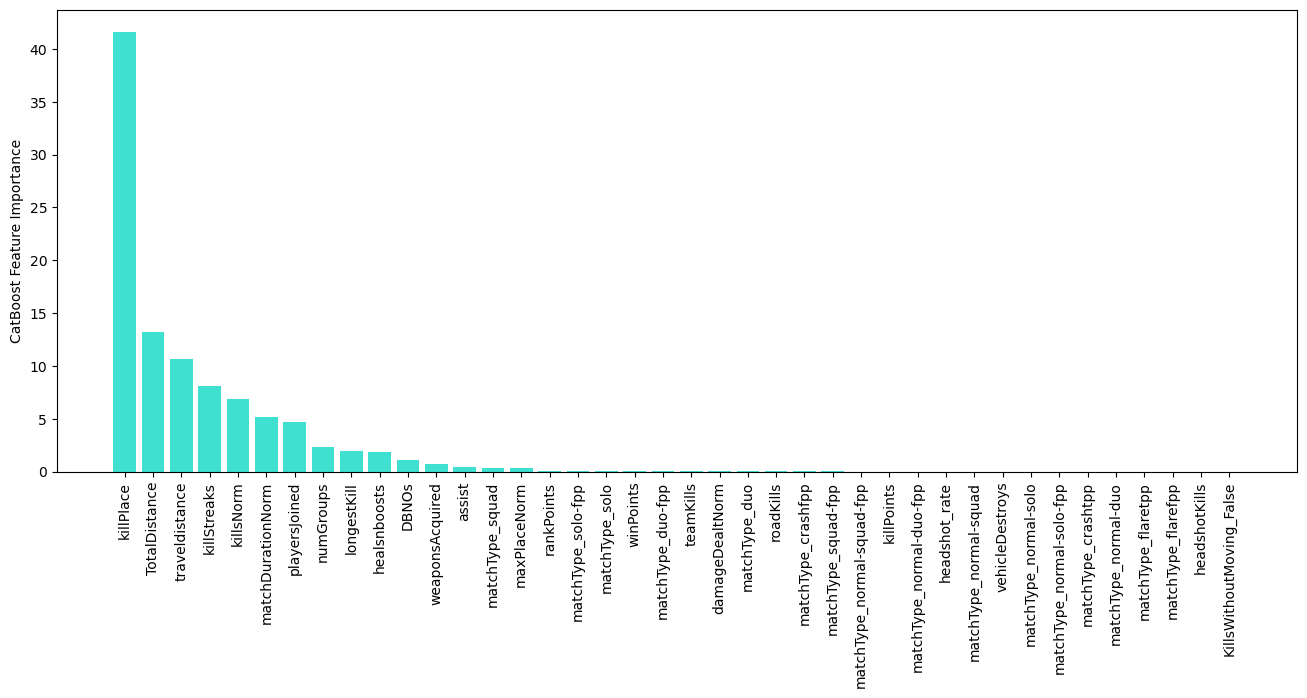

In [59]:
plt.bar(feature_importance_df.features, feature_importance_df.importance, color = 'turquoise')
plt.ylabel("CatBoost Feature Importance")
plt.xticks(rotation = 90)
plt.show()

### Prediction

In [60]:
pred = model.predict(xtest)

In [65]:
rmse = np.sqrt(mean_squared_error(ytest,pred))
r2 = r2_score(ytest,pred)

print('Testing performance')
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.08
R2: 0.93


<center><img src = 'https://gifdb.com/images/high/winner-winner-chicken-dinner-498-x-278-gif-pup0zj398j7tryh6.webp'></center>